# Supplementary Figures
## Imports

In [2]:
import pandas as pd
from Shared_Scripts.plotting_functions import correlation
import StudyII_All_5_note_Sets.paths as StudyII_paths


# Load Data
studyII_GL = pd.read_pickle(
    StudyII_paths.processed_dir + StudyII_paths.post_exclusion_data_pickle_filename)  # Study II: Post-exclusion group-level data

## Correlation between distribution of our data and the Krumhansl-Schmuckler Key Finding Algorithm

9999 of 10000p = 0.0
obs_stat = 0.6257379119702525


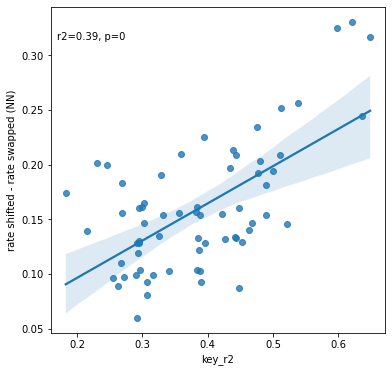

In [4]:
correlation(dataset=studyII_GL,x="key_r2", normalize=False, diatonic="include")